In [1]:
# function that takes the top ten percent CO from a file. Takes in all files and makes one file. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from coordinateSystems import GeographicSystem
from coordinateSystems import TangentPlaneCartesianSystem

In [36]:
def make_Vr_map(X,Y,date):        
    # plot of Vr
    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(12,1,(1,8))
    ax.set_xlim(-990,1390)
    ax.set_ylim(-800,1000)
    ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
    ax.scatter(X,Y,s=10,c='green',linewidth=0)

    ax.set_title(date,fontsize=14)
    ax.set_xlabel('East-West (meters)',fontsize=12)
    ax.set_ylabel('North-South (meters)',fontsize=12)
    majorLocator = MultipleLocator(200)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(labelsize=12)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.grid()

In [37]:
def make_CO_map(X,Y,date):        
    # plot of CO
    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(12,1,(1,8))
    ax.set_xlim(-990,1390)
    ax.set_ylim(-800,1000)
    ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
    ax.scatter(X,Y,s=10,c='r',linewidth=0)

    ax.set_title(date,fontsize=14)
    ax.set_xlabel('East-West (meters)',fontsize=12)
    ax.set_ylabel('North-South (meters)',fontsize=12)
    majorLocator = MultipleLocator(200)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(labelsize=10)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.grid()

In [41]:
def make_NO2_map(X,Y,date):        
    # plot of NO2
    fig = plt.figure(figsize=(5,6))
    ax = fig.add_subplot(12,1,(1,8))
    ax.set_xlim(-990,1390)
    ax.set_ylim(-800,1000)
    ax.scatter(0,0,c='black',s=100,linewidths=2,marker='x') # point of fixed site
    ax.scatter(X,Y,s=10,c='blue',linewidth=0)

    ax.set_title(date,fontsize=14)
    ax.set_xlabel('East-West (meters)',fontsize=12)
    ax.set_ylabel('North-South (meters)',fontsize=12)
    majorLocator = MultipleLocator(200)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(labelsize=12)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.grid()

In [39]:
def bot_ten_SCK1(filelist,var):
    '''
    Calculates top 10% CO levels for a list of files. Only for SCK1.
    Input the list of files.
    Output x(m), y(m) for plotting
    Makes Plots
    '''
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < stat[4]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1] # distances for plotting
        Y = Y[::-1] # distances for plotting
        

        make_CO_map(X,Y,str(item))

In [45]:
def top_ten_SCK1(filelist,var):
    '''
    Calculates top 10% NO2 levels for a list of files. Only for SCK1.
    Input the list of files.
    Output x(m), y(m) for plotting
    Makes Plots
    '''
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] > stat[12]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        
        make_NO2_map(X,Y,str(item))

In [54]:
SCK1_data = list([             # ommitted Oct2 because diff route
                 'Oct14.csv',#1
                 'Nov2.csv',
                 'Nov3.csv',
                 'Nov4.csv',
                 'Nov10.csv',#5
                 'Feb19.csv',
                 'Feb20.csv',
                 'Mar2.csv',
                 'Mar4.csv',
                 'Mar7.csv',#10
                 'Mar14.csv', 
                 'Mar21.csv',  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',#15
                 'Mar29.csv',
                 'Mar30.csv',
                 'Apr4.csv',
                 'Apr5.csv',
                 'Apr6.csv',#20
                 'Apr7.csv',
                 'Apr13.csv',
                 'Apr14.csv',
                 'Apr15.csv',
                 'Apr28.csv',#25
                 'Apr29.csv'#26
                              ])
                 
print SCK1_data

['Oct14.csv', 'Nov2.csv', 'Nov3.csv', 'Nov4.csv', 'Nov10.csv', 'Feb19.csv', 'Feb20.csv', 'Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr6.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv', 'Apr28.csv', 'Apr29.csv']


In [55]:
SCK2_data = list([             # ommitted Oct2 because diff route
                 
                 'Mar2.csv',#1
                 'Mar4.csv',
                 'Mar7.csv',
                 'Mar14.csv', 
                 'Mar21.csv',#5  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',
                 'Mar29.csv',
                 'Mar30.csv',#10
                 'Apr4.csv',
                 'Apr5.csv',
                 'Apr6.csv',
                 'Apr7.csv',
                 'Apr13.csv',#15
                 'Apr14.csv',
                 'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',#20
                 'May5.csv',
                 'May6.csv'#22
                              ])
                 
print SCK2_data

['Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr6.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv', 'Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


In [56]:
SCK3_data = list([             # ommitted Oct2 because diff route
                 
                 'Mar2.csv',#1
                 'Mar4.csv',
                 'Mar7.csv',
                 'Mar14.csv', 
                 'Mar21.csv',#5  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',
                 'Mar29.csv',
                 'Mar30.csv',#10
                 'Apr4.csv',
                 'Apr5.csv',#12
                 #'Apr6.csv',
                 'Apr7.csv',#13
                 'Apr13.csv',
                 'Apr14.csv',#15
                 'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',
                 'May5.csv',#20
                 'May6.csv'#21
                              ])
                 
print SCK3_data

['Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv', 'Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


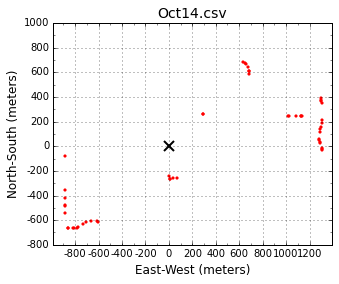

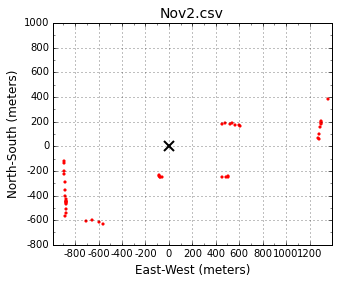

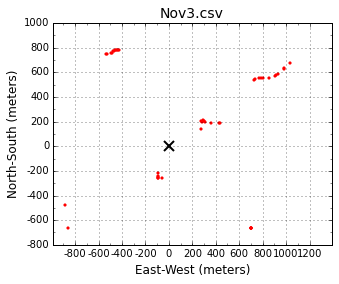

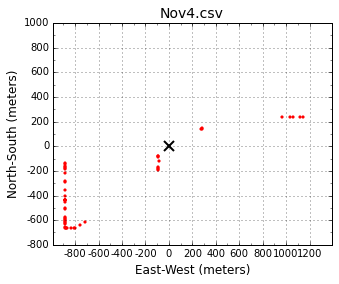

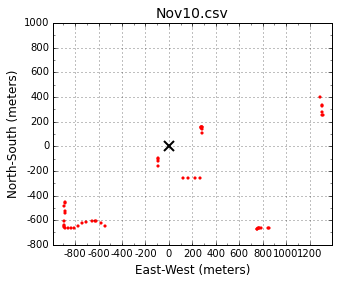

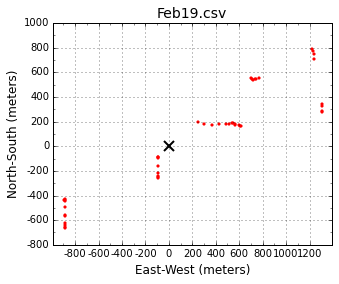

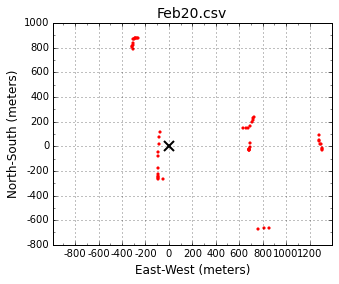

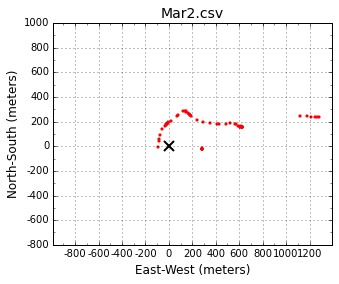

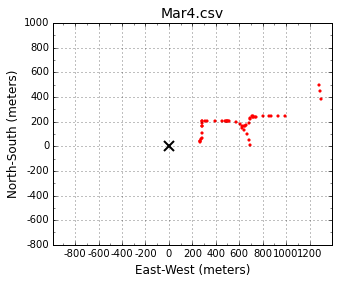

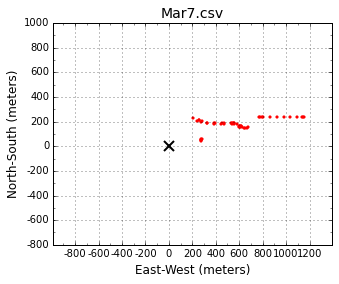

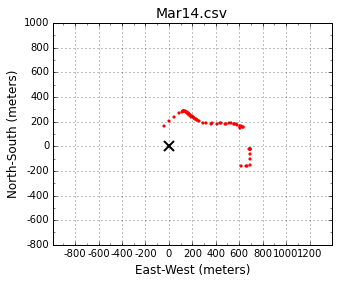

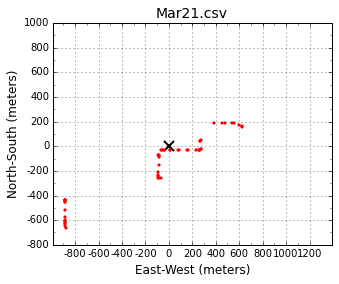

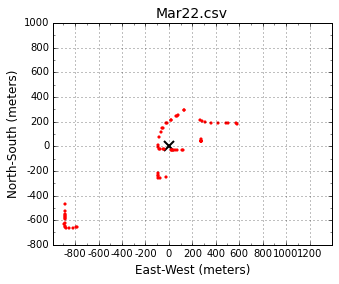

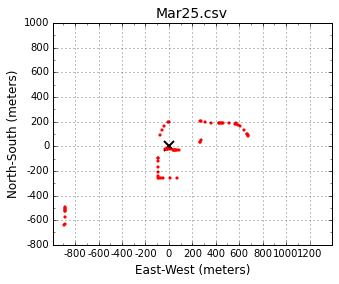

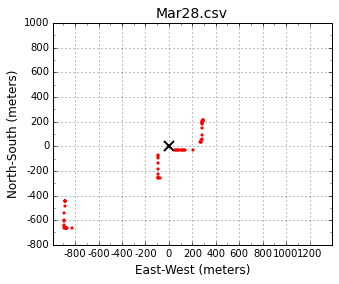

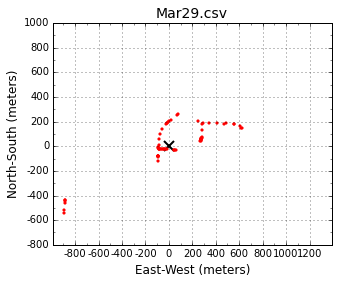

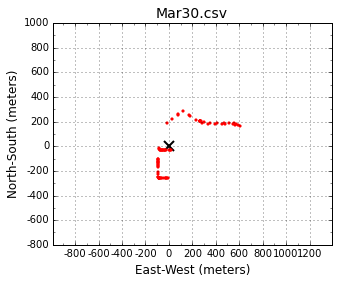

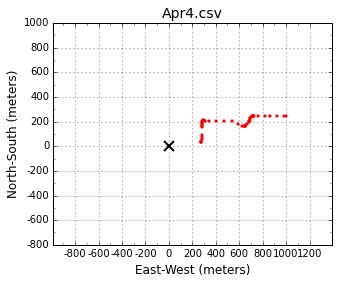

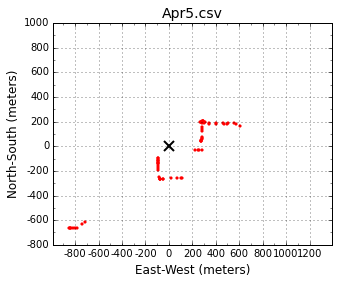

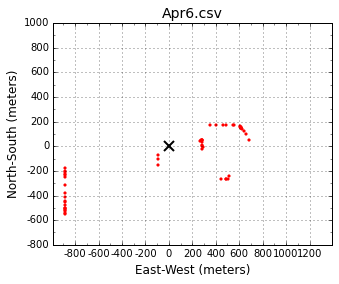

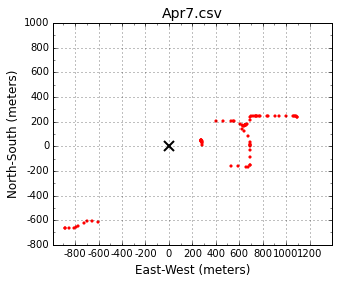

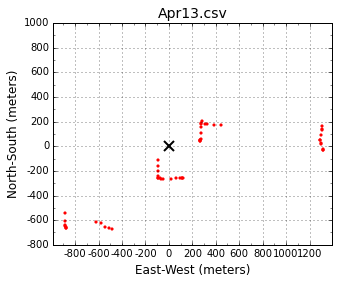

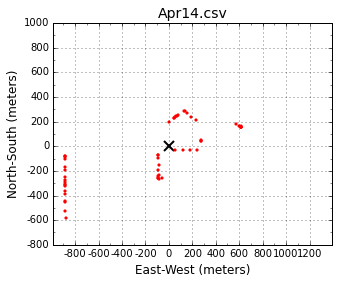

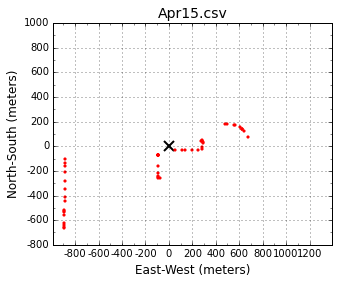

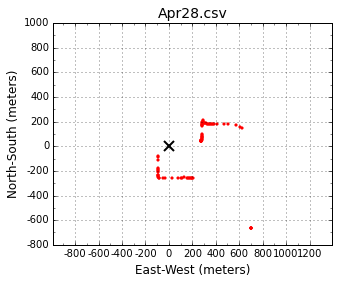

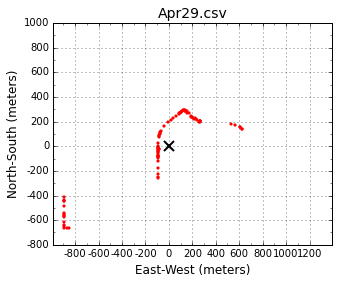

In [57]:
bot_ten_SCK1(SCK1_data,'SCK1_CO')

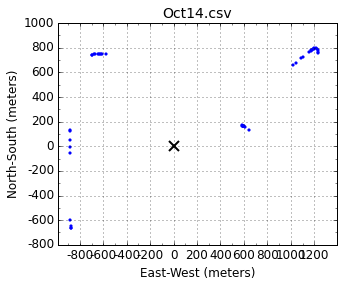

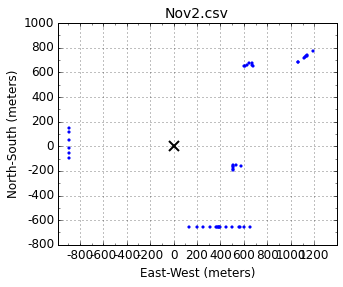

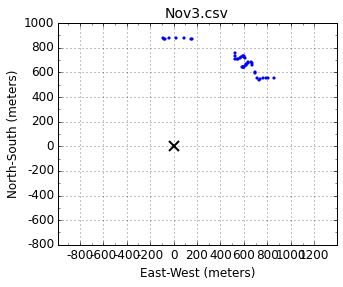

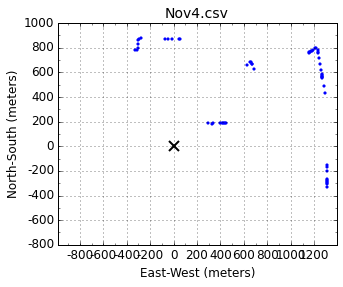

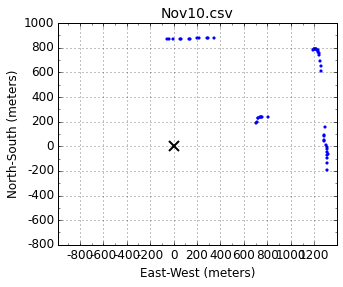

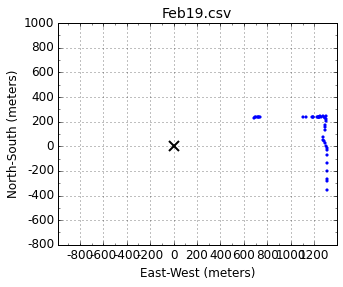

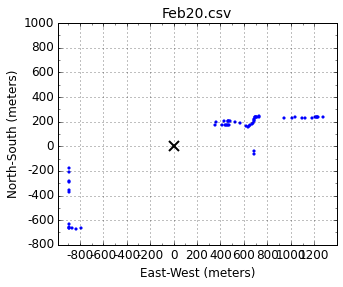

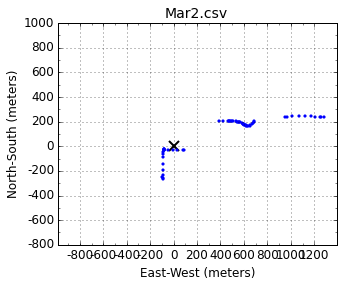

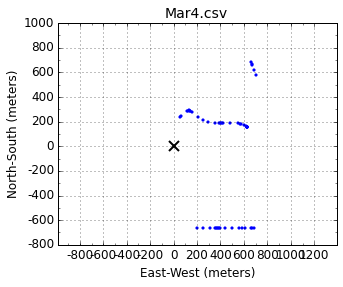

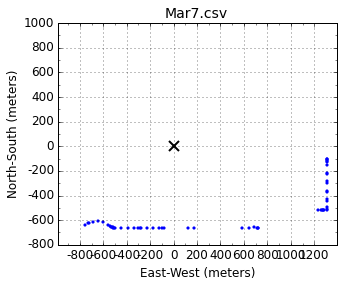

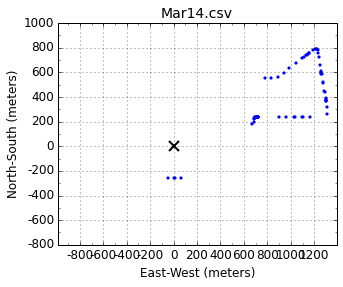

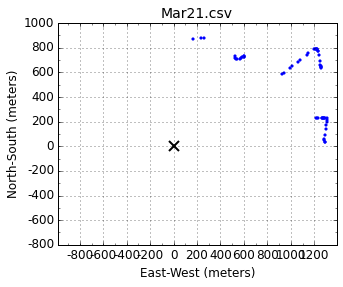

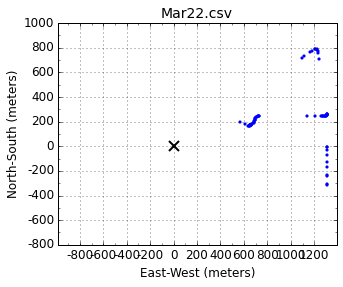

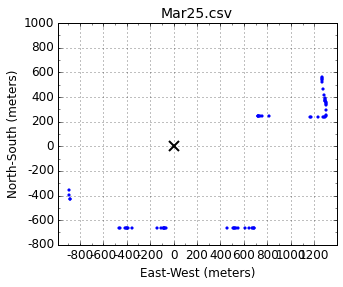

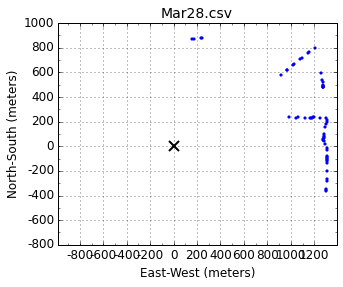

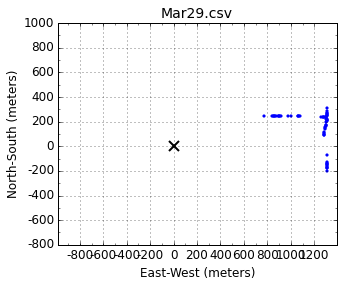

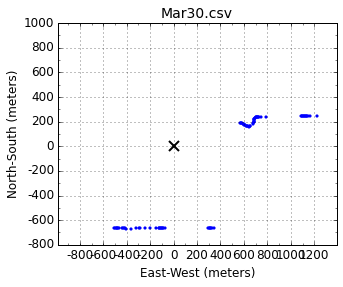

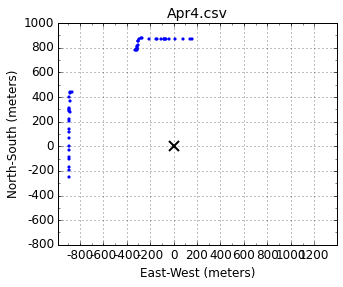

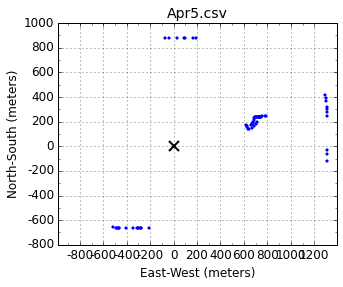

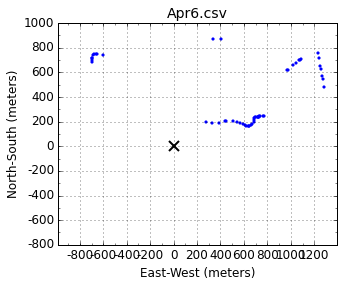

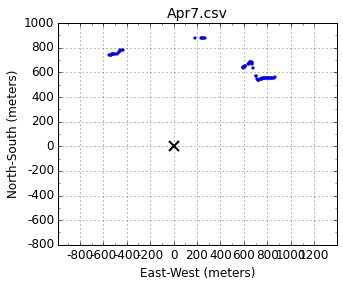

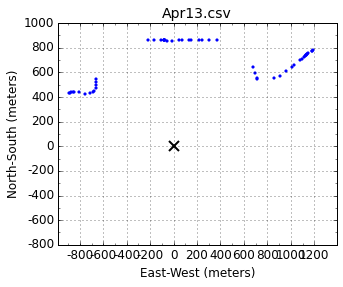

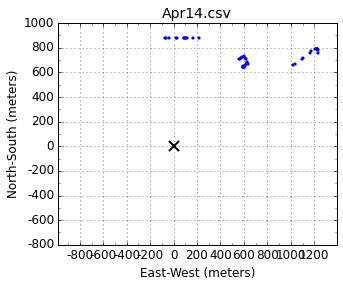

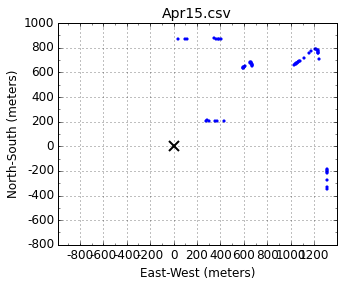

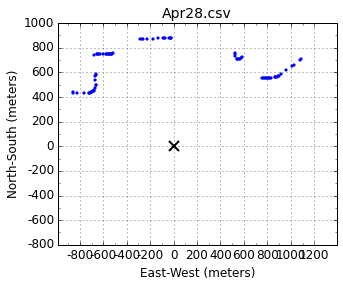

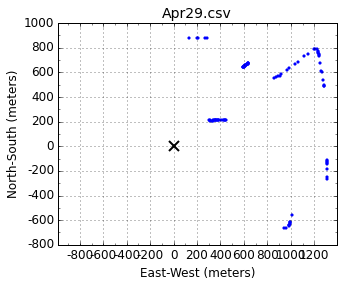

In [58]:
top_ten_SCK1(SCK1_data,'SCK1_NO2')

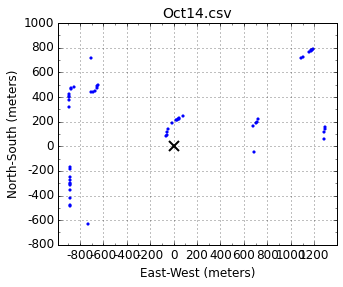

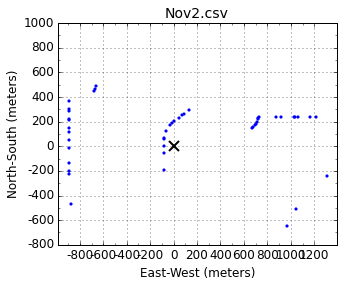

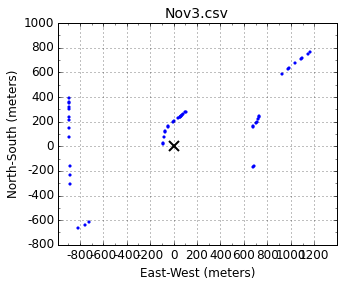

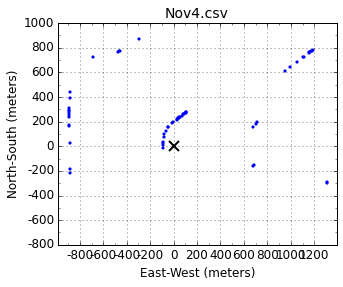

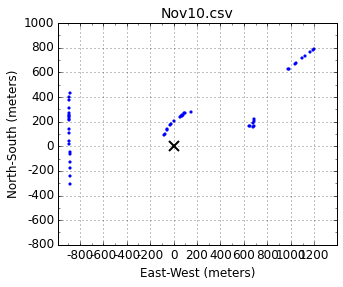

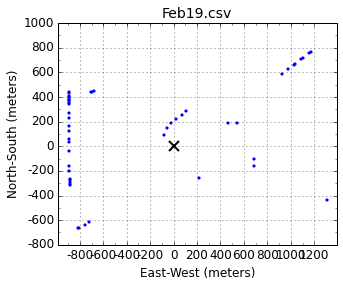

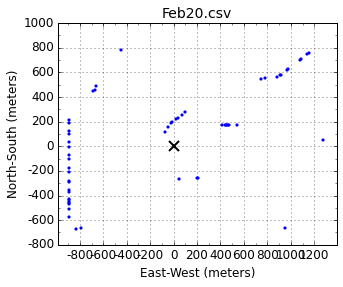

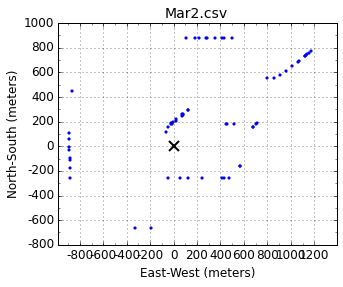

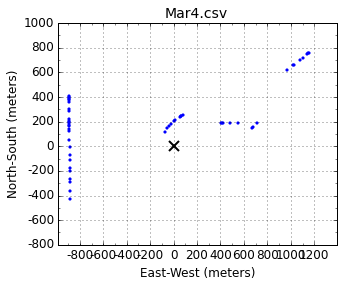

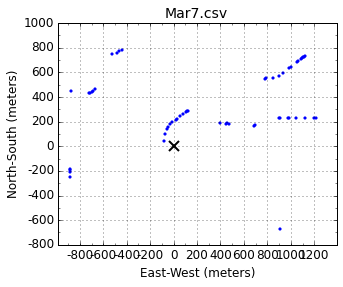

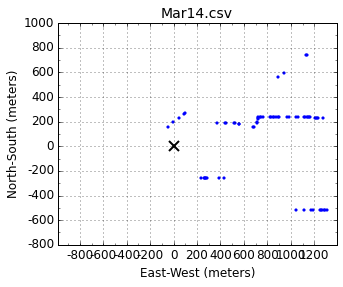

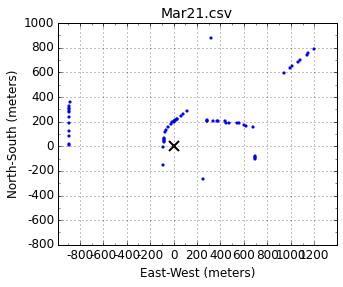

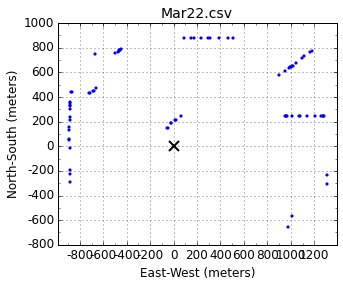

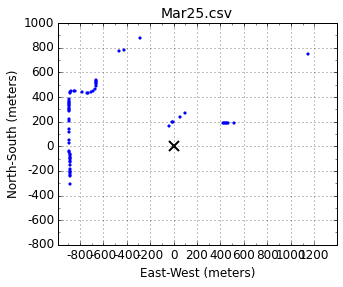

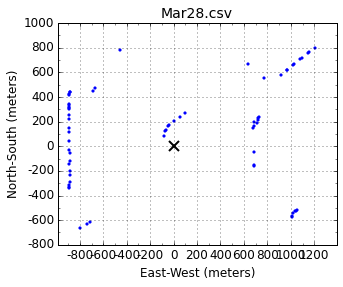

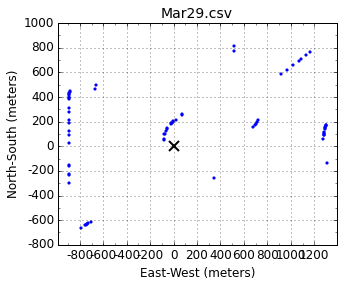

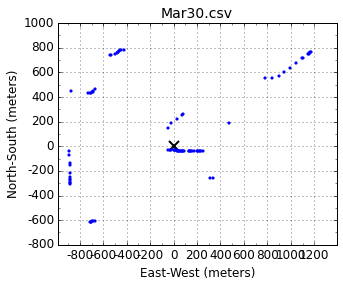

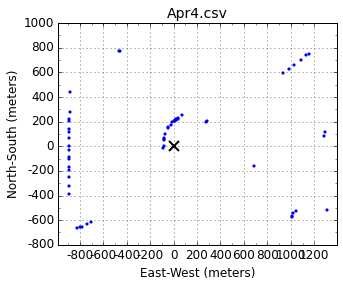

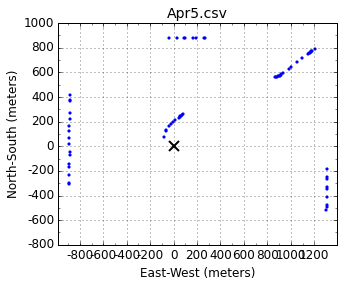

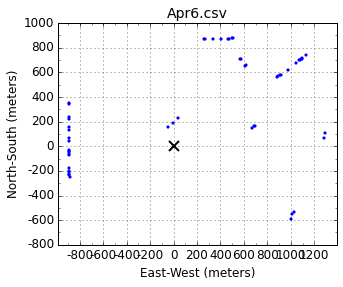

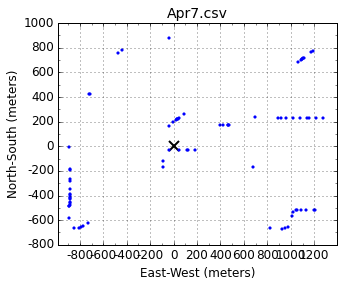

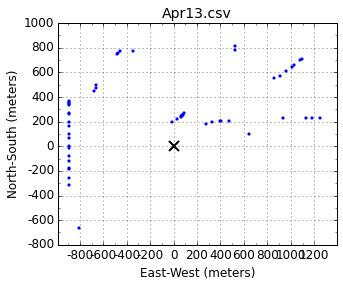

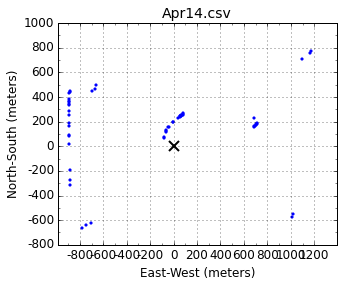

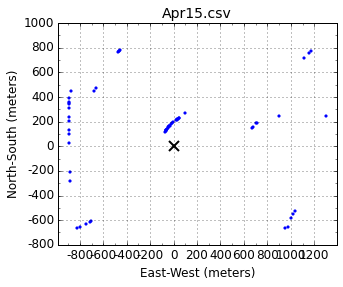

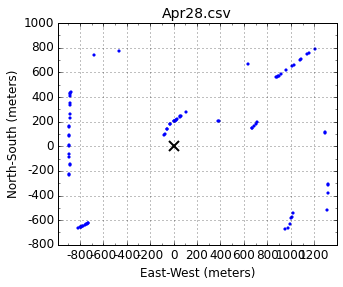

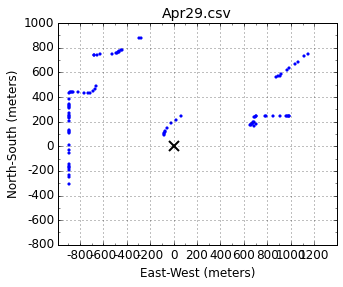

In [61]:
top_ten_SCK1(SCK1_data,'V_r')

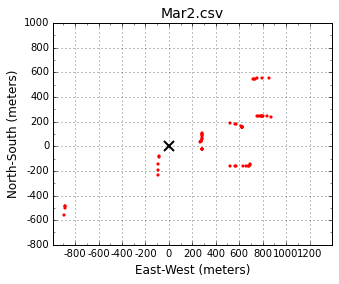

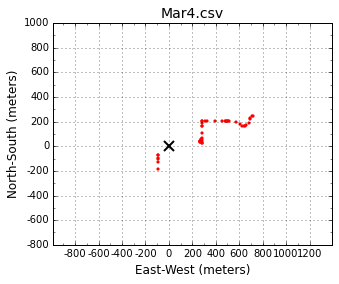

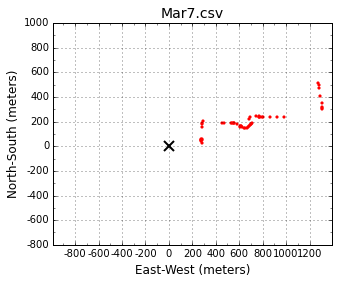

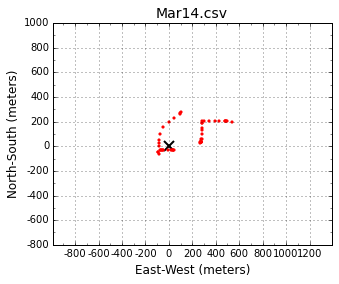

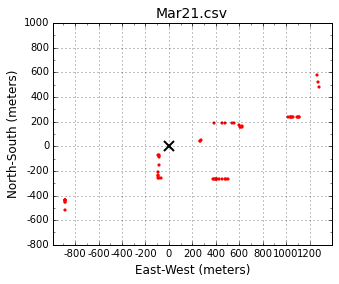

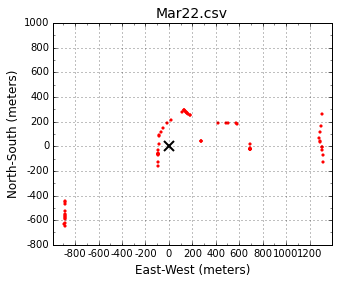

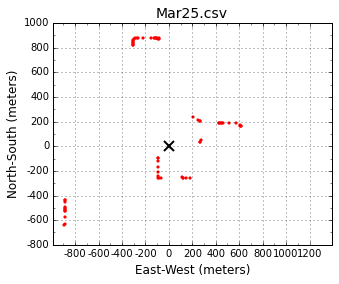

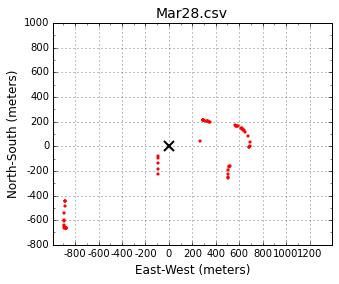

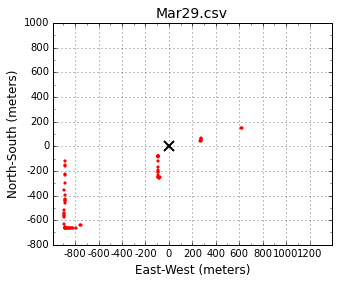

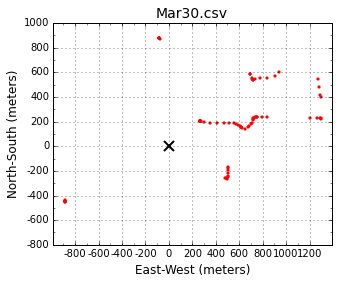

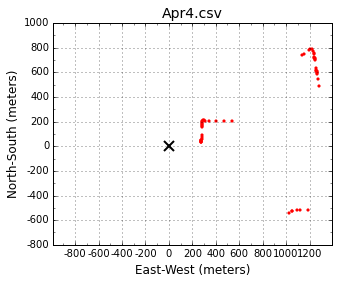

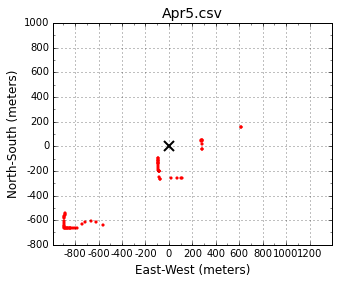

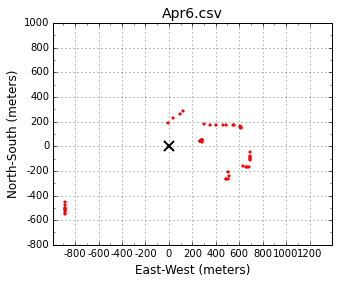

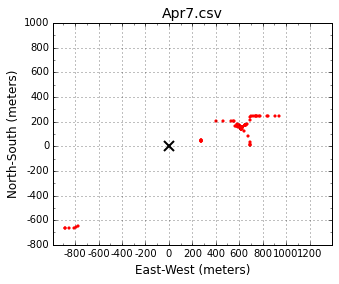

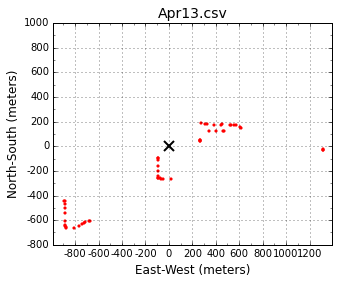

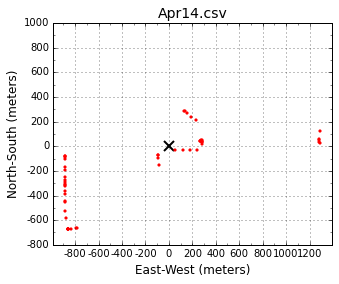

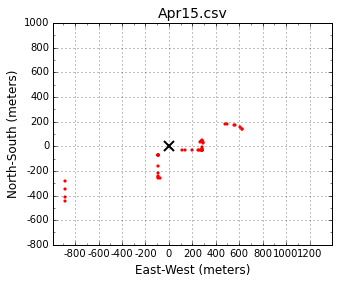

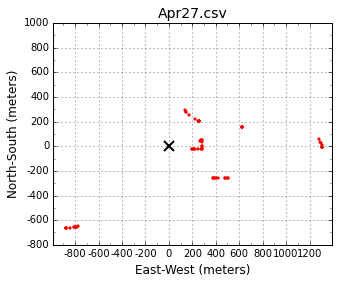

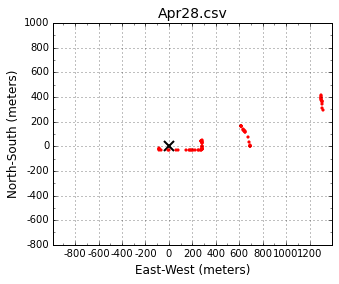

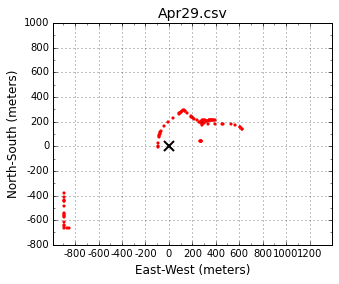

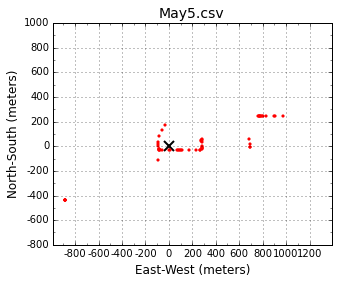

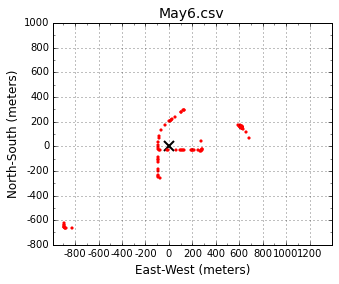

In [59]:
bot_ten_SCK1(SCK2_data,'SCK2_CO')

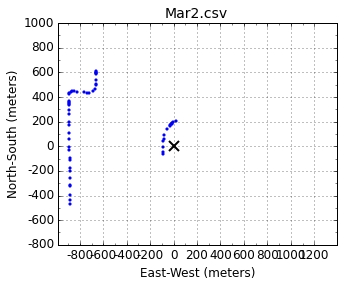

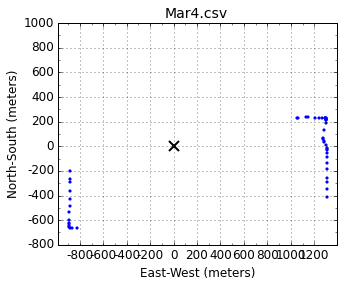

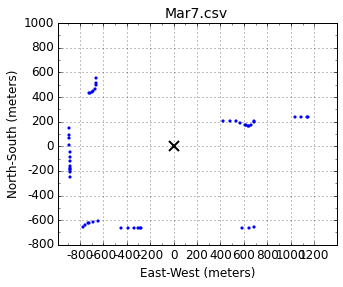

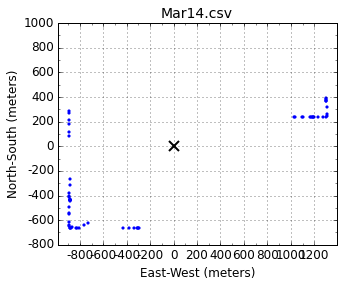

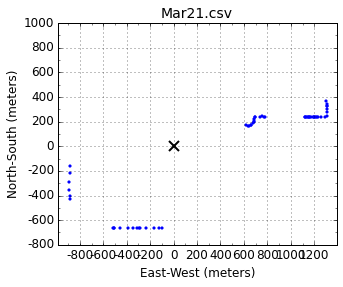

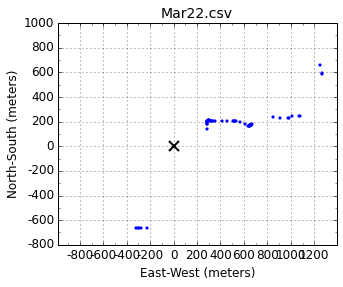

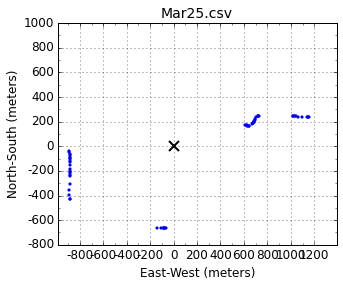

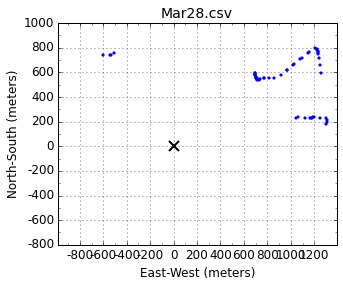

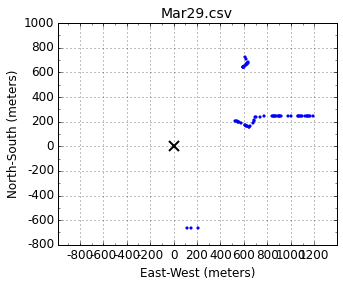

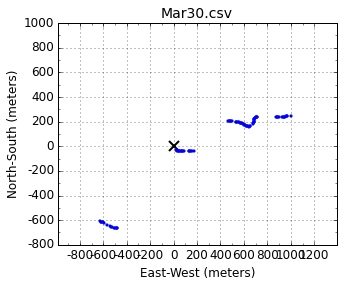

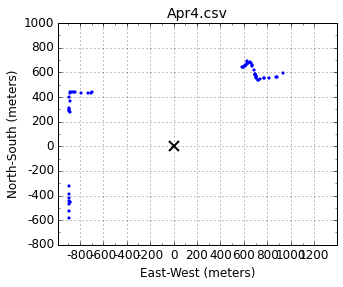

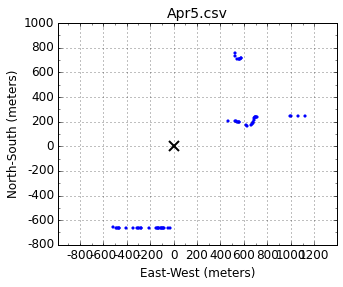

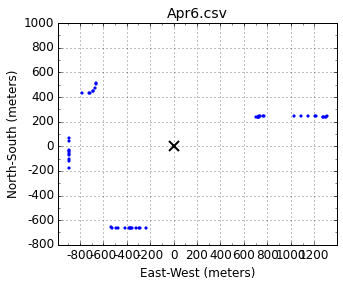

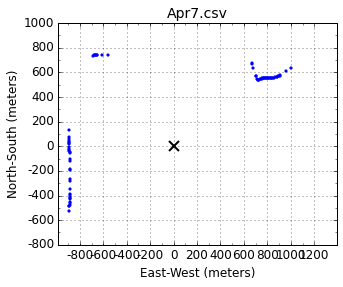

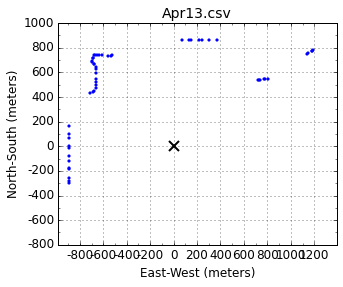

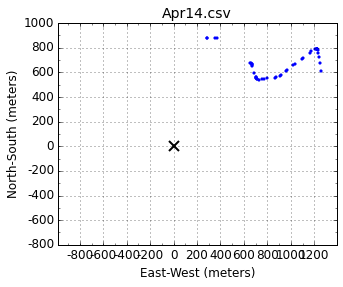

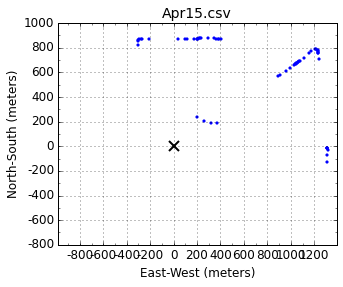

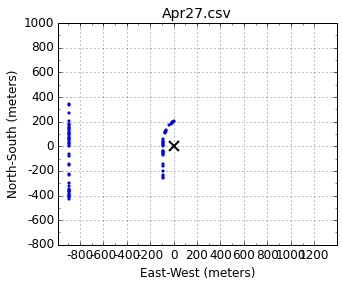

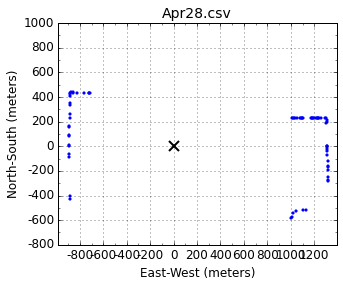

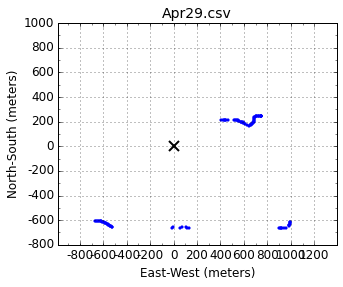

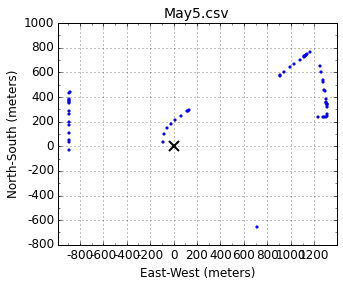

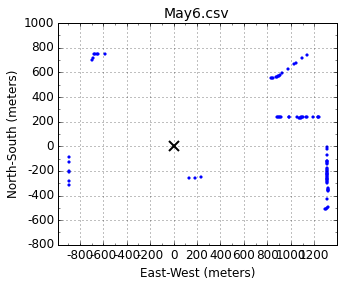

In [60]:
top_ten_SCK1(SCK2_data,'SCK2_NO2')

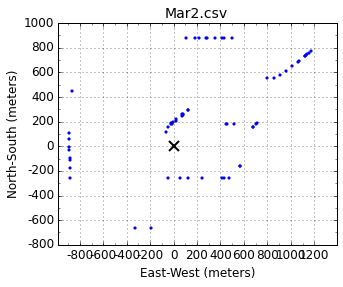

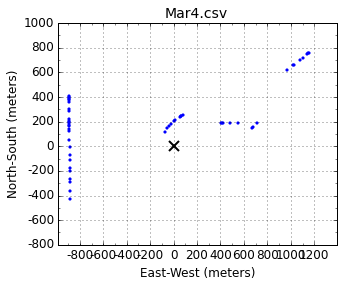

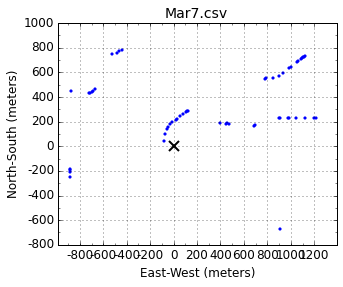

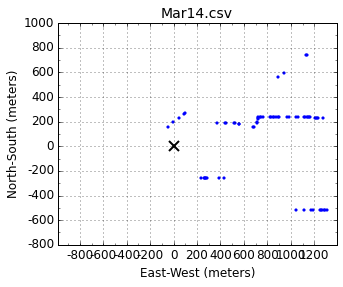

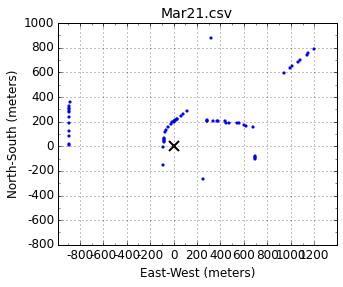

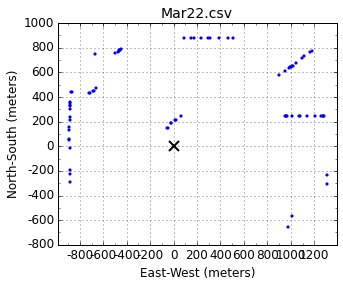

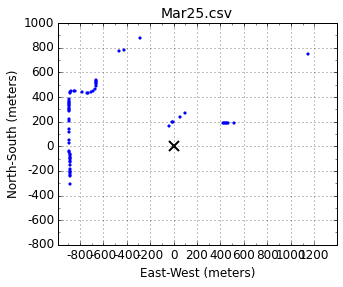

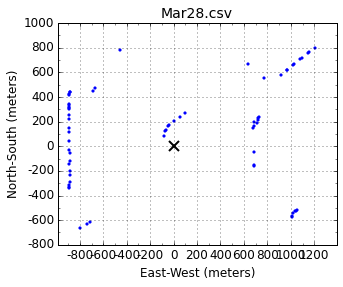

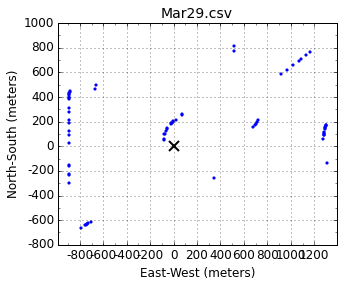

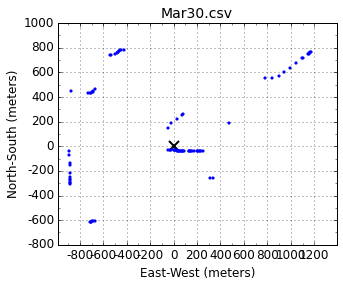

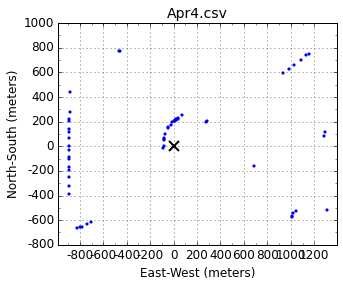

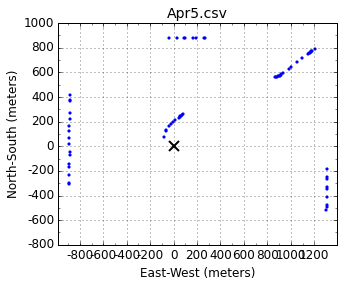

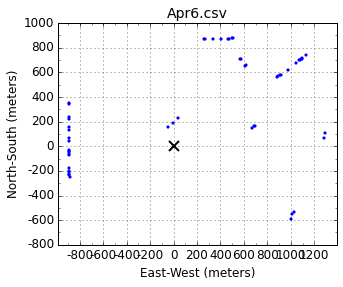

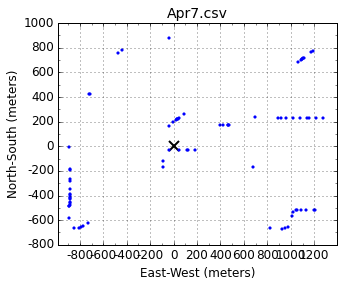

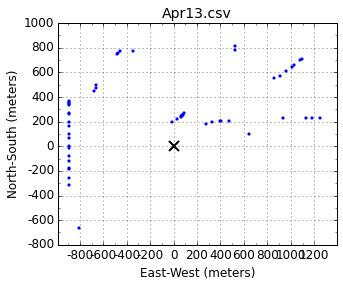

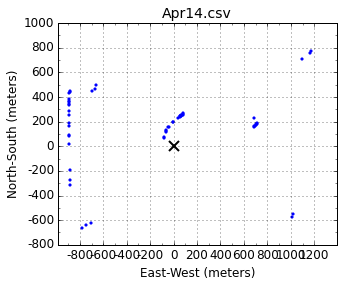

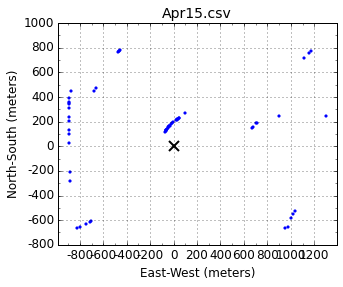

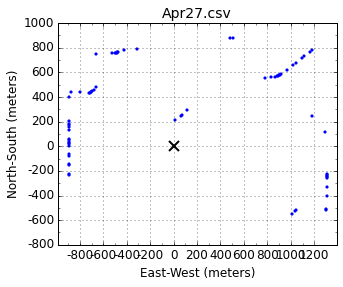

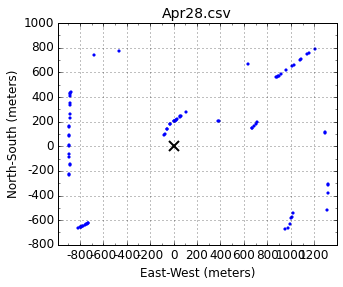

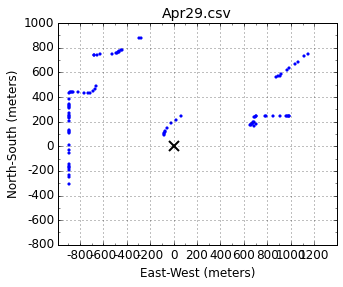

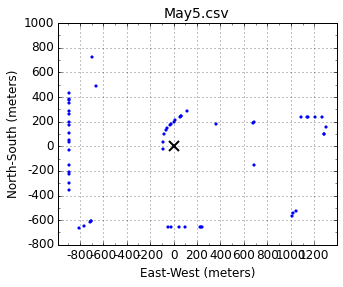

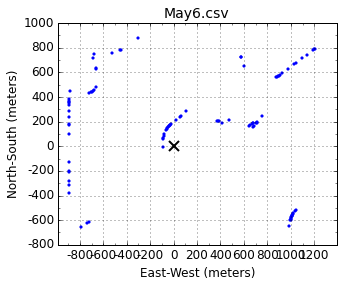

In [62]:
top_ten_SCK1(SCK2_data,'V_r')